<a href="https://www.kaggle.com/code/araspirbadian/real-estate-price-prediction?scriptVersionId=96793283" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn import metrics
from joblib import dump, load

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/real-estate-price-prediction/Real estate.csv


# Read the data 

In [2]:
data = pd.read_csv ('/kaggle/input/real-estate-price-prediction/Real estate.csv')
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


# Checking the correlations in the dataset

In [4]:
data_correlations = data.corr(method = 'pearson')

<AxesSubplot:>

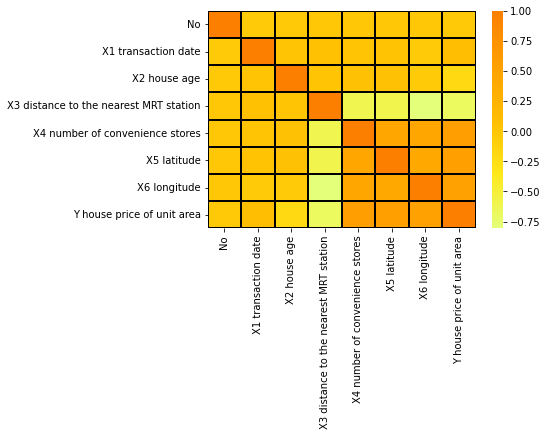

In [5]:
sns.heatmap(data_correlations, cmap='Wistia', linecolor='black', linewidths=2)

# Make features

In [6]:
polynomial_converter = PolynomialFeatures(degree = 3 , include_bias = False)
x = data.drop('Y house price of unit area', axis = 1)
y = data['Y house price of unit area']
polynomial_features = polynomial_converter.fit_transform(x)
polynomial_features.shape

(414, 119)

# Train test spliting

In [7]:
x_train, x_test, y_train, y_test = train_test_split( polynomial_features, y, test_size = 0.3, random_state = 101  )


# Generating the model

In [8]:
polymodel_norm = LinearRegression (normalize = True)
polymodel = LinearRegression (normalize = False)


# Training the regression model

In [9]:
model_fitted_normalized = polymodel_norm.fit(x_train, y_train )
model_fitted = polymodel.fit(x_train, y_train )

# Checking the trained model coefficients

In [10]:
#polymodel.shape
print(polymodel.coef_.shape)

(119,)


In [11]:
[polymodel.coef_ , polymodel_norm.coef_]

[array([-2.29351755e-01, -4.33595274e+01,  5.18371424e+01, -6.34684989e+02,
        -8.74374082e-01, -4.73621195e+01,  9.07105233e+00, -1.07158015e-01,
         2.14495423e+01,  1.70561106e+01, -6.25725989e-01,  1.57153378e+02,
        -4.94976704e+04,  9.81241789e+03, -2.71413717e+02, -2.25766800e+01,
        -8.25629191e+01, -1.09488275e+02,  1.74562849e+03,  9.28982265e+03,
         8.62036699e+01, -9.55356739e+00,  1.09906989e+03, -8.73573639e+02,
         4.80811711e+02, -1.30455023e-01,  6.19877932e+01,  5.70713824e+03,
         2.10532222e+02,  1.75031039e+04,  1.93894077e+01, -8.95595715e+01,
         3.44561903e+01,  2.21026951e+02,  1.11851682e+03, -4.47989351e-07,
         3.03417796e-05,  4.02663113e-06,  1.14171144e-08, -2.72820944e-06,
         5.10564363e-03, -6.67884763e-04,  4.24976168e-03, -2.27781527e-03,
        -2.60475382e-05, -1.61818925e-02,  1.39748723e+00, -6.03277329e-01,
        -2.65193403e-05, -1.91952154e-07,  3.44998376e-04, -2.76132023e-02,
        -9.6

# Predicting the prices per square feet

In [12]:
y_pred = polymodel.predict(x_test)
y_pred_norm = polymodel_norm.predict(x_test)

# Showing the results

In [13]:
pd.DataFrame ( {'Y_pred': y_pred, 'Y_test': y_test, 'Residual': y_test - y_pred}).head(10)

,Y_pred,Y_test,Residual
176,6.294983,19.2,12.905017
347,-200.766630,11.2,211.966630
307,119.940475,24.7,-95.240475
299,47.190846,46.1,-1.090846
391,21.196074,31.3,10.103926
212,33.137896,31.1,-2.037896
104,24.879708,30.5,5.620292
311,44.489129,42.2,-2.289129
98,51.284707,51.0,-0.284707
198,42.828188,39.1,-3.728188


# Showing the results for normalized

In [14]:
pd.DataFrame ( {'Y_pred': y_pred_norm, 'Y_test': y_test, 'Residual': y_test - y_pred_norm}).head(10)

,Y_pred,Y_test,Residual
176,9.320312,19.2,9.879687
347,-58.886719,11.2,70.086719
307,86.050781,24.7,-61.350781
299,49.876953,46.1,-3.776953
391,52.048828,31.3,-20.748828
212,32.816406,31.1,-1.716406
104,30.685547,30.5,-0.185547
311,40.884766,42.2,1.315234
98,50.718750,51.0,0.281250
198,42.771484,39.1,-3.671484


# Evaluating the performance 

In [15]:
MAE = metrics.mean_absolute_error ( y_pred, y_test)
MSE = metrics.mean_squared_error ( y_pred, y_test)
RMSE = np.sqrt (MSE )

MAE_norm = metrics.mean_absolute_error ( y_pred_norm, y_test)
MSE_norm = metrics.mean_squared_error ( y_pred_norm, y_test)
RMSE_norm = np.sqrt (MSE_norm )

# Showing the results 

In [16]:
pd.DataFrame ( {'Metrics': [MAE, MSE, RMSE], 'Normalized Features Metrics': [MAE_norm, MSE_norm, RMSE_norm]}, index=['MAE', 'MSE', 'RMSE'])

,Metrics,Normalized Features Metrics
MAE,10.087936,8.979037
MSE,565.917073,303.049002
RMSE,23.789012,17.408303


# Tuning the polynomal degree

In [17]:
RMSE_train_list = []
RMSE_test_list = []
RMSE_train_norm_list = []
RMSE_test_norm_list = []

for deg in range (1, 10):
    polynomial_converter = PolynomialFeatures(degree = deg , include_bias = False)
    polynomial_features = polynomial_converter.fit_transform(x)
    polynomial_features.shape
    x_train, x_test, y_train, y_test = train_test_split( polynomial_features, y, test_size = 0.3, random_state = 101  )
    
    polymodel = LinearRegression (normalize = False)
    polymodel.fit(x_train, y_train )
    y_pred = polymodel.predict(x_test)
    y_train_pred = polymodel.predict(x_train)
    
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
    RMSE_train = np.sqrt(metrics.mean_squared_error(y_train_pred, y_train))
    
    
    polymodel_norm = LinearRegression (normalize = True)
    polymodel_norm.fit(x_train, y_train )
    y_pred_norm = polymodel_norm.predict(x_test)
    y_train_pred_norm = polymodel_norm.predict(x_train)
    
    RMSE_test_norm = np.sqrt(metrics.mean_squared_error(y_pred_norm, y_test))
    RMSE_train_norm = np.sqrt(metrics.mean_squared_error(y_train_pred_norm, y_train))
    
    RMSE_train_list.append(RMSE_train)
    RMSE_test_list.append(RMSE_test)
    RMSE_train_norm_list.append(RMSE_train_norm)
    RMSE_test_norm_list.append(RMSE_test_norm)

# Tabularizing the RMSEs

In [18]:
RMSE_data = pd.DataFrame ( {'RMSE Train': RMSE_train_list, 'RMSE Test': RMSE_test_list, 'RMSE Train Normalized': RMSE_train_norm_list, 'RMSE Test Normalized': RMSE_test_norm_list}, index = range ( 1,10))
RMSE_data.head(9)

,RMSE Train,RMSE Test,RMSE Train Normalized,RMSE Test Normalized
1,9.537107,6.773500e+00,9.537107e+00,6.773500
2,8.037433,5.692358e+00,8.037286e+00,5.701029
3,7.100083,2.378901e+01,6.485044e+00,17.408303
4,5.757400,2.866984e+02,7.868664e+00,8369.923922
5,1.810744,6.306535e+03,5.068476e-06,1582.965021
6,0.516267,3.366243e+04,7.646442e-07,6882.875133
7,0.725855,2.020910e+05,6.461227e-08,1938.670196
8,0.378090,1.588560e+06,5.864039e-08,2009.299462
9,0.435372,1.501139e+07,2.050122e-08,2522.178763


# Plotting the RMSEs

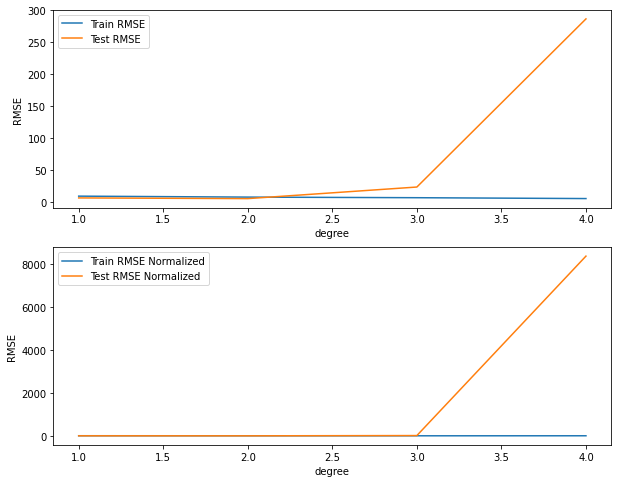

In [19]:
fig , ax = plt.subplots(2, figsize = (10,8))
ax[0].plot (range (1,5),RMSE_train_list[:4], label = 'Train RMSE' )
ax[0].plot (range (1,5),RMSE_test_list[:4], label = 'Test RMSE' )
ax[0].set_xlabel ('degree')
ax[0].set_ylabel ('RMSE')
ax[0].legend()
ax[1].plot (range (1,5),RMSE_train_norm_list[:4], label = 'Train RMSE Normalized' )
ax[1].plot (range (1,5),RMSE_test_norm_list[:4], label = 'Test RMSE Normalized' )
ax[1].set_xlabel ('degree')
ax[1].set_ylabel ('RMSE')
ax[1].legend()

# Scaling the X_train

In [20]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_trans = scaler.transform(x_train)
x_test_trans = scaler.transform(x_test)

# Using RidgeCV with regularaization

In [21]:

ridgecvmodel = RidgeCV( alphas=(0.1, 1.0, 10.0, 50, 100, 200, 500, 1000, 2000, 5000), scoring = 'neg_mean_absolute_error')
ridgecvmodel.fit(x_train_trans, y_train )
ridgecvmodel.coef_

array([-0.00040104,  0.02016688, -0.03316771, ...,  0.00922612,
       -0.0038235 , -0.02197472])

# RidgeCV to predict housing prices

In [22]:
y_pred_ridgecv = ridgecvmodel.predict(x_test_trans)
y_pred_ridgecv.shape


(125,)

# Calculating RMSE

In [23]:
RMSE_ridgecv_test = np.sqrt(metrics.mean_squared_error(y_pred_ridgecv, y_test))
RMSE_ridgecv_test

6.300200659173363

In [24]:
ridgecvmodel.alpha_

1000.0

# Saving the model

In [25]:
dump(ridgecvmodel, 'ridgecvmodel.joblib') # where can I find this? 

['ridgecvmodel.joblib']

# Setting up and training Lasso Model 

In [26]:
#lasso_cv_model = LassoCV(eps = 0.0001, n_alphas = 10, cv =10, max_iter = 1000)
lasso_cv_model = LassoCV(alphas=( 10.0, 50, 100, 200, 500, 1000, 2000, 5000), cv =3, max_iter = 1000)


In [27]:
%%time
lasso_cv_model.fit(x_train_trans, y_train)

CPU times: user 3.3 s, sys: 1.45 s, total: 4.75 s
Wall time: 2.54 s


LassoCV(alphas=(10.0, 50, 100, 200, 500, 1000, 2000, 5000), cv=3)

In [28]:
lasso_cv_model.alpha_

10.0

# Calculating the lasso errors

In [29]:
y_pred_lasso = lasso_cv_model.predict(x_test)
MAE_lasso = metrics.mean_absolute_error (y_pred_lasso, y_test)
MSE_lasso = metrics.mean_squared_error (y_pred_lasso, y_test)
RMSE_lasso = np.sqrt (MSE_lasso)
pd.DataFrame ({'Metrics': [MAE_lasso, MSE_lasso, RMSE_lasso]}, index=['MAE_lasso', 'MSE_lasso', 'RMSE_lasso'])

,Metrics
MAE_lasso,9.187665
MSE_lasso,134.714367
RMSE_lasso,11.606652
